<a href="https://colab.research.google.com/github/Me-Vish/TASK1_AI_WEATHER_FORECASTING/blob/main/Day_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#getting the data
df=pd.read_csv("/content/StudentsPerformance.csv")

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


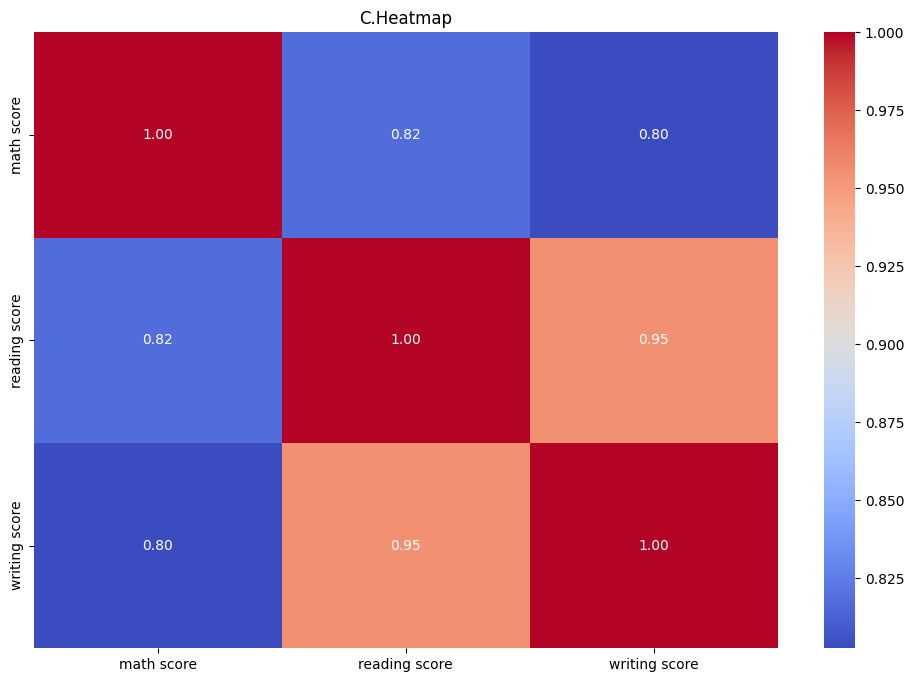

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("C.Heatmap")
plt.show()

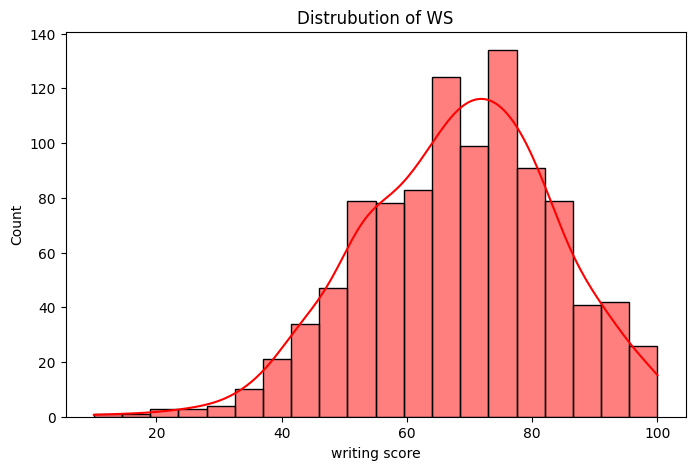

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['writing score'],bins=20,kde=True,color="red") #plt.hist()
plt.title("Distrubution of WS")
plt.show()

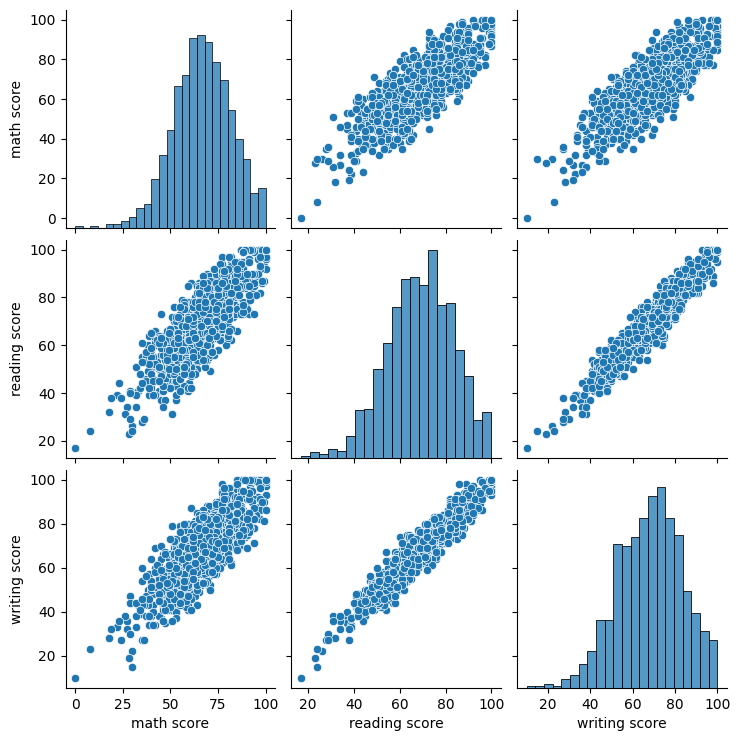

In [ ]:
numeric_feature=['math score','reading score','writing score']
sns.pairplot(df[numeric_feature])
plt.show()

In [ ]:
#feature selection
features=['reading score','writing score']
X=df[features]
y=df['math score']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
print("Intercept:",model.intercept_)
print("Coefficients:",model.coef_)

Intercept: 7.85940588782988
Coefficients: [0.57555997 0.27176146]


In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred

array([80.18552589, 65.6849504 , 69.44210877, 72.01611012, 76.82827724,
       72.22379745, 65.26957575, 59.81777453, 69.44210877, 50.08186415,
       48.22703597, 28.80271723, 75.91688168, 61.84825297, 77.57948748,
       75.03752319, 49.20250566, 46.29266872, 55.91700296, 62.39177588,
       68.05126443, 51.88808314, 68.89858586, 50.04982709, 74.7977988 ,
       71.95203599, 70.56119165, 55.67727857, 46.62850431, 57.54757169,
       58.45896725, 61.72010471, 59.33832574, 68.29098882, 71.47258721,
       53.31096455, 72.59167009, 73.10315594, 72.86343155, 20.36154   ,
       71.95203599, 62.6955744 , 61.44834326, 62.32770175, 78.31523277,
       64.50179339, 66.90014448, 32.70348879, 80.79312293, 76.52447872,
       70.04970581, 71.7123116 , 74.52603734, 55.85292884, 69.71387022,
       70.56119165, 75.30928464, 53.07124016, 76.62058991, 84.66185743,
       43.1431074 , 79.84969031, 73.64667885, 60.90482035, 83.54277455,
       72.46352184, 67.47570445, 52.49568018, 63.95827048, 86.72

In [ ]:
mse=mean_squared_error(y_test,y_pred)

In [ ]:
mse

77.24297821278955

In [ ]:
r2=r2_score(y_test,y_pred)

In [ ]:
r2

0.6825697127424626

# Underfitting

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [ ]:
np.random.seed(42)
X = np.linspace(-3, 3, 80).reshape(-1, 1)
y = 2 * X**2 + 3 * X + 5 + np.random.randn(80, 1) * 3

In [ ]:
lr = LinearRegression()
lr.fit(X, y)
y_pred_lr = lr.predict(X)

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

poly_lr = LinearRegression()
poly_lr.fit(X_poly, y)
y_pred_poly = poly_lr.predict(X_poly)

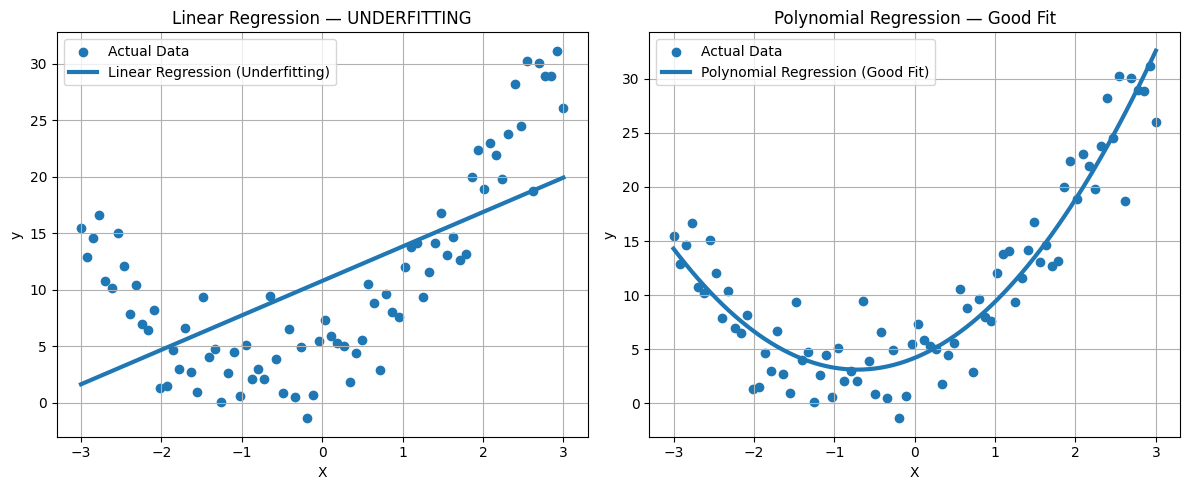

In [ ]:
plt.figure(figsize=(12,5))
# -- LEFT: Linear Regression Underfits
plt.subplot(1, 2, 1)
plt.scatter(X, y, label="Actual Data")
plt.plot(X, y_pred_lr, label="Linear Regression (Underfitting)", linewidth=3)
plt.title("Linear Regression — UNDERFITTING")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X, y, label="Actual Data")
plt.plot(X, y_pred_poly, label="Polynomial Regression (Good Fit)", linewidth=3)
plt.title("Polynomial Regression — Good Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#Overfitting

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

In [ ]:
print("Dataset loaded successfully!")
print("Train shape:", x_train.shape)
print("Test shape: ", x_test.shape)

Dataset loaded successfully!
Train shape: (50000, 32, 32, 3)
Test shape:  (10000, 32, 32, 3)


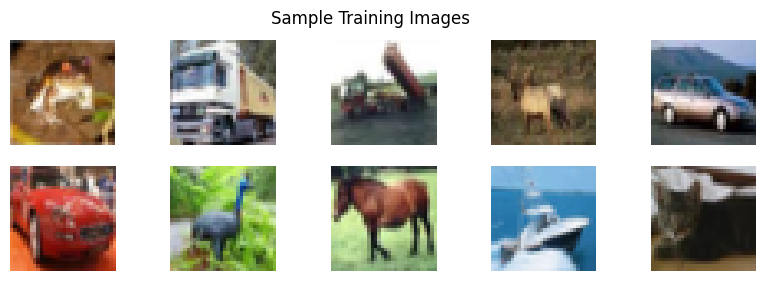

In [ ]:
plt.figure(figsize=(10, 3))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.axis("off")
plt.suptitle("Sample Training Images")
plt.show()

In [ ]:
small_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

small_model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

history_small = small_model.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test)
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.3855 - loss: 1.6855 - val_accuracy: 0.5628 - val_loss: 1.2485
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6048 - loss: 1.1210 - val_accuracy: 0.6330 - val_loss: 1.0431
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6564 - loss: 0.9791 - val_accuracy: 0.6654 - val_loss: 0.9810
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7015 - loss: 0.8731 - val_accuracy: 0.6614 - val_loss: 0.9895
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7195 - loss: 0.8043 - val_accuracy: 0.6949 - val_loss: 0.8968


In [ ]:
big_model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.0),   # intentionally removed regularization
    layers.Dense(10, activation='softmax')
])

big_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history_big = big_model.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test)
)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.2673 - loss: 1.9372 - val_accuracy: 0.5357 - val_loss: 1.2715
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 11ms/step - accuracy: 0.5803 - loss: 1.1545 - val_accuracy: 0.6532 - val_loss: 0.9767
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6907 - loss: 0.8669 - val_accuracy: 0.6896 - val_loss: 0.8887
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7522 - loss: 0.7045 - val_accuracy: 0.7200 - val_loss: 0.7948
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7945 - loss: 0.5803 - val_accuracy: 0.7437 - val_loss: 0.7577
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8293 - loss: 0.4789 - val_accuracy: 0.7398 - val_loss: 0.8022
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8645 - loss: 0.3808 - val_accuracy: 0.7496 - val_loss: 0.8155
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8938 -

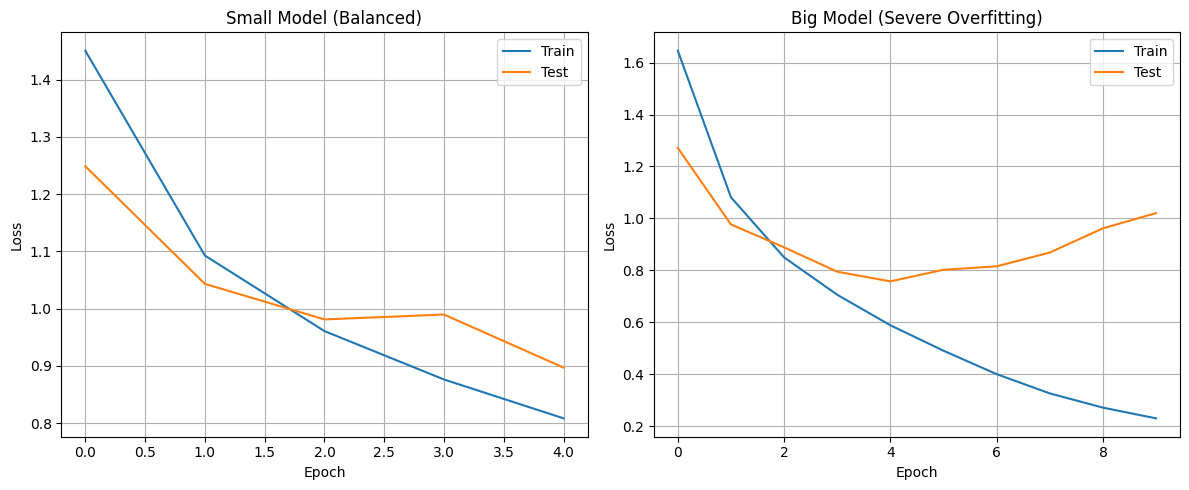

In [ ]:
plt.figure(figsize=(12,5))

# SMALL MODEL
plt.subplot(1,2,1)
plt.plot(history_small.history['loss'])
plt.plot(history_small.history['val_loss'])
plt.title("Small Model (Balanced)")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"])
plt.grid(True)

# BIG MODEL
plt.subplot(1,2,2)
plt.plot(history_big.history['loss'])
plt.plot(history_big.history['val_loss'])
plt.title("Big Model (Severe Overfitting)")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"])
plt.grid(True)

plt.tight_layout()
plt.show()


#LOSS FUNCTION


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
np.random.seed(42)
X = np.linspace(0, 10, 50).reshape(-1, 1)
y = 3 * X.flatten() + 5 + np.random.normal(0, 3, 50)

In [ ]:
# Fit Linear Regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [ ]:
MAE = mean_absolute_error(y, y_pred)
MSE = mean_squared_error(y, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y, y_pred)

In [ ]:
print("----- LOSS VALUES -----")
print("MAE:        ", MAE)
print("MSE:        ", MSE)
print("RMSE:       ", RMSE)
print("R2 Score:     ", R2)

----- LOSS VALUES -----
MAE:         2.2235308318513334
MSE:         7.426276156000418
RMSE:        2.725119475546057
R2 Score:      0.9031743908043623


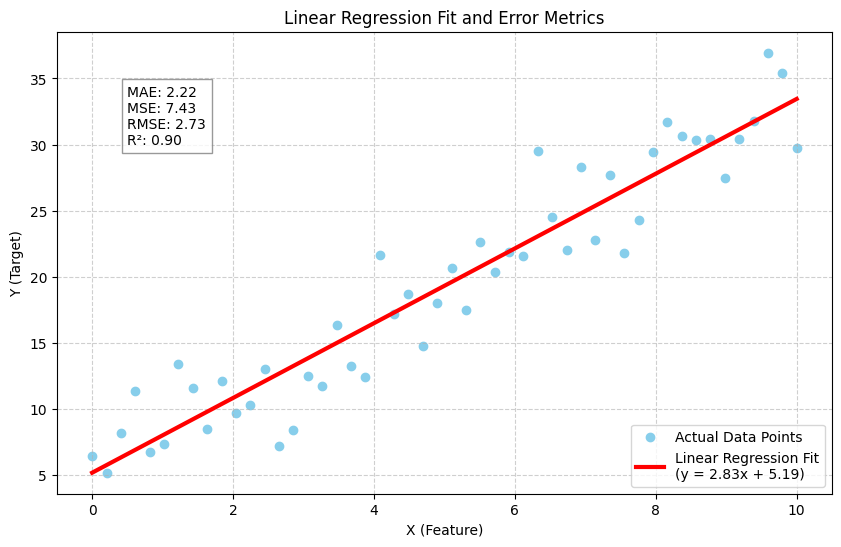

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='skyblue', label='Actual Data Points')
plt.plot(X, y_pred, color='red', linewidth=3, label=f'Linear Regression Fit\n(y = {model.coef_[0]:.2f}x + {model.intercept_:.2f})')
plt.title("Linear Regression Fit and Error Metrics")
plt.xlabel("X (Feature)")
plt.ylabel("Y (Target)")
plt.text(0.5, 30, f'MAE: {MAE:.2f}\nMSE: {MSE:.2f}\nRMSE: {RMSE:.2f}\nR²: {R2:.2f}',
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'),
         fontsize=10)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()